# Find EBUS Bounds
- Experimenting with initial extraction boundaries for the EBUS.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
def setup_map(ax, lon, lat):
    m = Basemap(projection='eqdc',
                lat_0=np.nanmedian(lat),
                lon_0=np.nanmedian(lon),
                llcrnrlon=np.nanmin(lon),
                urcrnrlon=np.nanmax(lon),
                llcrnrlat=np.nanmin(lat),
                urcrnrlat=np.nanmax(lat),
                resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='black')
    m.drawmapboundary(fill_color='white')
    m.drawparallels(np.arange(np.floor(np.nanmin(lat)), 
                              np.ceil(np.nanmax(lat)), 3),
                   labels=[True,False,False,False])
    m.drawmeridians(np.arange(np.floor(np.nanmin(lon)), 
                              np.ceil(np.nanmax(lon)), 3),
                   labels=[False, False, True, False])
    return m

In [3]:
def detect_EBUS(x):
    if x == "CalCS":
        lat1 = 25
        lat2 = 46
        lon1 = 215
        lon2 = 260
        return lat1, lat2, lon1, lon2
    elif x == "BenCS":
        print "Benguela."
    else:
        raise ValueError('\n' + 'Must select from the following EBUS strings:' + '\n' + 
                         'CalCS' + '\n' + 'BenCS' + '\n' + 'CanCS' + '\n' + 'HumCS')

In [4]:
def find_indices(latGrid, lonGrid, latPoint, lonPoint):
    dx = lonGrid - lonPoint
    dy = latGrid - latPoint
    reducedGrid = abs(dx) + abs(dy)
    min_ix = np.nanargmin(reducedGrid)
    i, j = np.unravel_index(min_ix, reducedGrid.shape)
    return i, j

In [5]:
fileDir = '/glade2/scratch2/rbrady/fgco2_monthly/'
fileName = 'reduced.FG_CO2.001.192001-210012.nc'
ds = xr.open_dataset(fileDir + fileName, decode_times=False)

In [6]:
pandaTimes = pd.date_range('1920-01', '2101-01', freq='M')
ds['FG_CO2'] = ds['FG_CO2'] * ((-1 * 3600 * 24 * 365.25) / (1000 * 100))
ds['time'] = pandaTimes
del ds['time_bound']
del ds['d2']
ds.attrs = {}

# Peruvian Bounds
- 16S to 6S
- ~85W to 70W

In [7]:
ds_peru = ds.copy()
a, c = find_indices(ds['TLAT'].values, ds['TLONG'].values, -20, 260)
b, d = find_indices(ds['TLAT'].values, ds['TLONG'].values, 0, 290)

In [8]:
ds_peru = ds_peru.sel(nlat=slice(a, b), nlon=slice(c, d), time=slice('1920-01', '2005-12'))

In [9]:
lon = ds_peru['TLONG'].values
lat = ds_peru['TLAT'].values
data = ds_peru['FG_CO2'][0].values

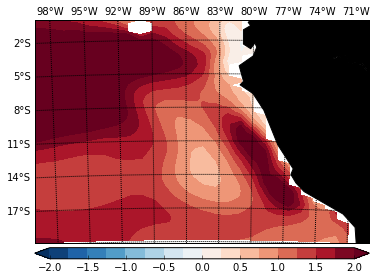

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")

In [11]:
ds_peru = ds_peru.where(ds_peru['TLAT'] <= -6).where(ds_peru['TLAT'] >= -16)

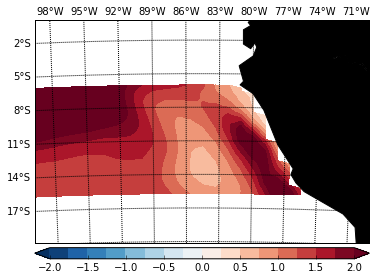

In [12]:
lon = ds_peru['TLONG'].values
lat = ds_peru['TLAT'].values
data = ds_peru['FG_CO2'][0].values

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")

# Canary Bounds
- 12N to 22N
- 25W to 10W

In [29]:
ds_canary = ds.copy()
a, c = find_indices(ds['TLAT'].values, ds['TLONG'].values, 10, 330)
b, d = find_indices(ds['TLAT'].values, ds['TLONG'].values, 24, 355)

In [30]:
ds_canary = ds_canary.sel(nlat=slice(a, b), nlon=slice(c, d), time=slice('1920-01', '2005-12'))

In [31]:
lon = ds_canary['TLONG'].values
lat = ds_canary['TLAT'].values
data = ds_canary['FG_CO2'][0].values

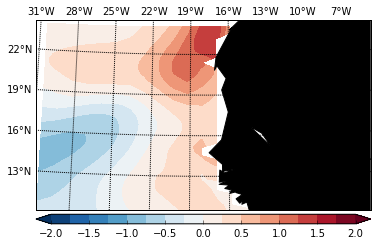

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")

In [33]:
ds_canary = ds_canary.where(ds_canary['TLAT'] <= 22).where(ds_canary['TLAT'] >= 12)

In [34]:
lon = ds_canary['TLONG'].values
lat = ds_canary['TLAT'].values
data = ds_canary['FG_CO2'][0].values

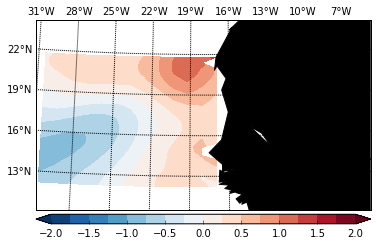

In [35]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")

# Benguela Bounds
- 28S to 18S
- 5E to 20E

In [36]:
ds_ben = ds.copy()
lon = np.asarray(ds_ben['TLONG'])
for x in np.nditer(lon, op_flags=['readwrite']):
    if x > 180:
        x[...] = x - 360
ds_ben['TLONG'] = (('nlat', 'nlon'), lon)

In [37]:
a, c = find_indices(ds['TLAT'].values, ds['TLONG'].values, -30, -10)
b, d = find_indices(ds['TLAT'].values, ds['TLONG'].values, -16, 20)

In [38]:
ds_ben = ds_ben.sel(nlat=slice(a, b), nlon=slice(c, d), time=slice('1920-01', '2005-12'))

In [39]:
lon = ds_ben['TLONG'].values
lat = ds_ben['TLAT'].values
data = ds_ben['FG_CO2'].mean(dim='time').values

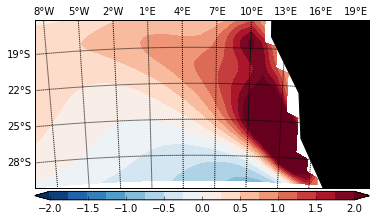

In [40]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")

In [41]:
ds_ben = ds_ben.where(ds_ben['TLAT'] >= -28).where(ds_ben['TLAT'] <=-18)

In [42]:
lon = ds_ben['TLONG'].values
lat = ds_ben['TLAT'].values
data = ds_ben['FG_CO2'].mean(dim='time').values

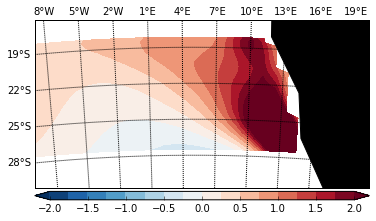

In [43]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
m = setup_map(ax, lon, lat)
m.contourf(lon, lat, data, np.arange(-2, 2.1, 0.25),
           latlon=True, cmap="RdBu_r", extend="both")
m.colorbar(location="bottom")